In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

(0.8999999999999999, 0.0009430623223403325)

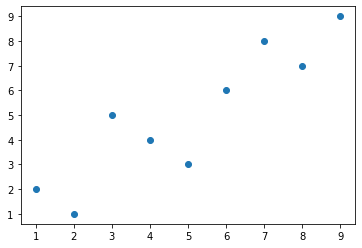

In [2]:
# Example1
dat1 = np.array([3,5,1,6,7,2,8,9,4])
dat2 = np.array([5,3,2,6,8,1,7,9,4])
fig,ax = plt.subplots()
ax.scatter(dat1,dat2)
stats.pearsonr(dat1,dat2)

(-0.15862545510551507, 0.11495455077506744)

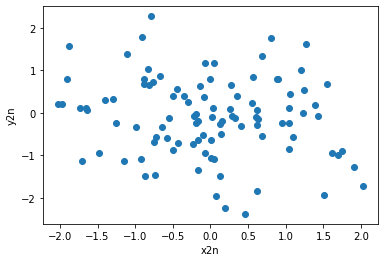

In [11]:
#Example2: Two random sequence with normal distribution
rng = np.random.default_rng()
x2n = rng.standard_normal((100,))
y2n = rng.standard_normal((100,))
fig, ax = plt.subplots()
ax.scatter(x2n,y2n)
ax.set_xlabel('x2n')
ax.set_ylabel('y2n')
stats.pearsonr(x2n, y2n)
#stats.spearmanr(x2n, y2n)

(0.00841691124614799, 0.9337621987673613)

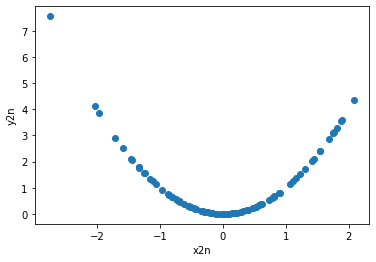

In [12]:
#Example3
rng = np.random.default_rng()
x2n = rng.standard_normal((100,))
y2n = np.array(x2n)**2
fig, ax = plt.subplots()
ax.scatter(x2n,y2n)
ax.set_xlabel('x2n')
ax.set_ylabel('y2n')
stats.pearsonr(x2n, y2n)

KendalltauResult(correlation=0.3888888888888889, pvalue=0.18018077601410934)

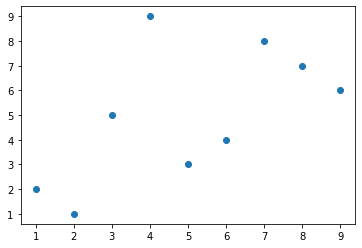

In [21]:
# Example4 -- Kendall correlation coefficient
from scipy.stats.stats import kendalltau

dat1 = np.array([3,5,1,9,7,2,8,4,6])
dat2 = np.array([5,3,2,6,8,1,7,9,4])
fig,ax = plt.subplots()
ax.scatter(dat1,dat2)
kendalltau(dat1,dat2)

In [27]:
# Tau_a
dat1 = np.array([3,5,1,6,7,2,8,8,4])
dat2 = np.array([5,3,2,6,8,1,7,8,4])
c = 0
d = 0
for i in range(len(dat1)):
    for j in range(i+1,len(dat1)):
        if (dat1[i]-dat1[j])*(dat2[i]-dat2[j])>0:
            c = c + 1
        else:
            d = d + 1
tau_a = (c - d) * 2 / len(dat1)/(len(dat1)-1)
            
print('tau_a = {0}'.format(tau_a))            


tau_a = 0.6111111111111112


In [28]:
# Tau_b
from scipy.stats.stats import kendalltau

dat1 = np.array([3,5,1,6,7,2,8,8,4])
dat2 = np.array([5,3,2,6,8,1,7,8,4])
#dat1 = np.array([3,5,1,9,7,2,8,4,6])
#dat2 = np.array([5,3,2,6,8,1,7,9,4])
c = 0
d = 0
t_x = 0
t_y = 0
for i in range(len(dat1)):
    for j in range(i+1,len(dat1)):
        if (dat1[i]-dat1[j])*(dat2[i]-dat2[j])>0:
            c = c + 1
        elif (dat1[i]-dat1[j])*(dat2[i]-dat2[j])<0:
            d = d + 1
        else:
            if (dat1[i]-dat1[j])==0 and (dat2[i]-dat2[j])!=0:
                t_x = t_x + 1
            elif (dat1[i]-dat1[j])!=0 and (dat2[i]-dat2[j])==0:
                t_y = t_y + 1
                
tau_b = (c - d) / np.sqrt((c+d+t_x)*(c+d+t_y))
            
print('tau_b = {0}'.format(tau_b))            
print('kendalltau(dat1,dat2) =  {0}'.format(kendalltau(dat1,dat2)))

tau_b = 0.6857142857142857
kendalltau(dat1,dat2) =  KendalltauResult(correlation=0.6857142857142857, pvalue=0.011424737055271894)
